# <center> Econ 390: Computational Economics (with Python) </center>
## <center> Dr. Yaroslav Rosokha</center>

# Monte Carlo Simulations, Markov Chains, & Re-sampling Methods

## Contents

- [Monte Carlo Simulations](#monte-carlo)
- [Randomization in Python](#randomization)
    - [random](#random)
    - [numpy.random](#numpy)
    - [scipy.stats](#scipy)
- [Resampling](#resampling)
    - [Bootstraping](#bootstrapping)
    - [Permutation Test](#permutation)
    - [itertools](#itertools)
    
## Resources
- [random](https://docs.python.org/3/library/random.html)
- [numpy.random]()
- [scipy.stats](https://python-programming.quantecon.org/scipy.html#Statistics)

- [Permutation Tests](https://docs.python.org/3/library/random.html)
    - [Cool visualization by Jared Wilber](https://www.jwilber.me/permutationtest/)
    - [John Rauser Video](https://www.youtube.com/watch?v=5Dnw46eC-0o&feature=emb_logo)


In [3]:
#Libraries that we have covered before that are used in this notebook
import matplotlib.pyplot as plt
%matplotlib inline

<a id="monte-carlo"></a>
# Monte Carlo Simulations

> The **Monte Carlo** method uses repeated random sampling to generate simulated data to explore the behavior of a complex system or a process.

The Monte Carlo simulations can be applied to a wide range of problems
- Physics
- Economics 
- Finance
- Engineering
- Biology
- Politics 
- Sports (e.g., [FiveThirtyEight.com](https://projects.fivethirtyeight.com/2020-nfl-predictions))


### The Monte Carlo Approach

1. Determine the model
2. Repeatedly sample from the random components of the model to obtain many realizations
3. Evaluate the measures of interest

## The Birthday Problem

How many people would you need in a group in order for there to be a 50-50 chance that at least two people will share a birthday?

<a id="randomization"></a>
# Randomization in Python

<a id="random"></a>
## [random](https://docs.python.org/3/library/random.html)

This library implements pseudo-random number generators for various distributions.

In [2]:
import random

In [70]:
random.random() #random number from a uniform distribution on [0,1)

0.6525664746650951

In [71]:
left=0
right=5
random.randint(left,right) #random integer n such that left<=n<=right

3

In [72]:
someList=['xy','z']
random.choice([1,2,3,4,5,'a','b',someList])

2

In [86]:
random.seed(10) #initialize internal state of the random number generator
print(random.random()) #if you re-run this cell (Ctrl+Enter) the same number will be drawn every time
print(random.choice([1,2,3,4,5,'a','b',someList]))

0.5714025946899135
b


In [89]:
print(random.random())

0.46258050809294915


In [105]:
m=0 #Mean
s=1 #Standard deviation
random.gauss(m,s) # normal distribution with mean m and standard deviation s

0.6177773889682747

In [106]:
a,b = 2,3
random.betavariate(a,b) #Beta distribution with parameters a and b

0.3081247974979426

<a id="numpy"></a>
## [np.random](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#random-sampling-numpy-random)

If you need to generate a large array of random numbers at once, you should consider using np.random module from NumPy

In [2]:
import numpy as np

In [115]:
#Note that we have already imported numpy as np above
np.random.rand(3,3) #random uniform on [0,1)

array([[0.5659774 , 0.3485686 , 0.03523685],
       [0.10511182, 0.99269695, 0.44390276],
       [0.03754112, 0.59235932, 0.89928459]])

In [123]:
np.random.randint(low=0,high=10,size=(2,2)) #random integer on [low,high)

array([[5, 7],
       [1, 8]])

In [131]:
np.random.seed(10)#set seed
np.random.rand(2,3)

array([[0.77132064, 0.02075195, 0.63364823],
       [0.74880388, 0.49850701, 0.22479665]])

In [134]:
np.random.rand(10) #create an array of random numbers

array([0.61776698, 0.51313824, 0.65039718, 0.60103895, 0.8052232 ,
       0.52164715, 0.90864888, 0.31923609, 0.09045935, 0.30070006])

In [135]:
np.random.rand(5,5) #create a matrix of random numbers

array([[0.11398436, 0.82868133, 0.04689632, 0.62628715, 0.54758616],
       [0.819287  , 0.19894754, 0.8568503 , 0.35165264, 0.75464769],
       [0.29596171, 0.88393648, 0.32551164, 0.1650159 , 0.39252924],
       [0.09346037, 0.82110566, 0.15115202, 0.38411445, 0.94426071],
       [0.98762547, 0.45630455, 0.82612284, 0.25137413, 0.59737165]])

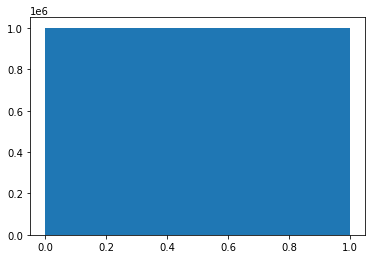

In [143]:
data1 = np.random.rand(10000000)
plt.hist(data1)
plt.show()

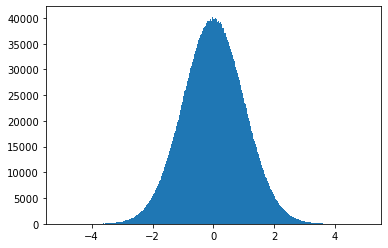

In [146]:
data2 = np.random.randn(10000000)
bins = np.linspace(-5,5,1000)
plt.hist(data2,bins)
plt.show()

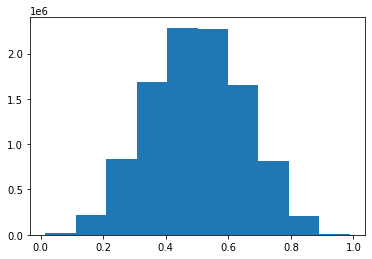

In [150]:
data3 = np.random.beta(5,5,size=10000000)
plt.hist(data3)
plt.show()

<a id="scipy"></a>
## [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)

If you need to work with distributions, with an easy access to pdf, cdf, etc., you should consider using the stats module from SciPy

In [151]:
from scipy import stats

In [152]:
stats.t?

In [154]:
d=stats.t(15)

In [156]:
print(d.cdf(np.array([.25])))

[0.59701056]


In [158]:
d.pdf(np.array([.1,.2,.3]))

array([0.39026688, 0.38408252, 0.3740187 ])

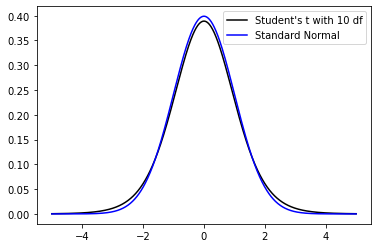

In [163]:
df=10 #degrees of freedom
dist_t = stats.t(df) #create the distribution object
dist_n = stats.norm() 


#Visulize
x = np.linspace(-5, 5, 1000)
plt.plot(x, dist_t.pdf(x), c='black',label='Student\'s t with %.i df'%(df))
plt.plot(x, dist_n.pdf(x), c='blue',label='Standard Normal')
plt.legend()
plt.show()

In [165]:
dist_t.cdf(0) #cumulative distribution at .5

0.5

In [166]:
dist_t.cdf(10000)

1.0

In [167]:
dist_t.cdf(2)-dist_t.cdf(-2)

0.9266119652292596

In [168]:
dist_t.rvs(100) #draw 100 observations from this distribution

array([ 0.04037166, -0.64386694, -0.19538664,  0.48312916,  0.31567483,
       -0.44167512,  2.36839729,  0.60720476, -1.47463788,  0.26870675,
       -3.3931152 , -1.06703222, -0.36774277,  0.2323612 , -0.16837757,
       -1.15428952,  0.15691826,  1.89009711,  3.51160295,  0.29696375,
        0.29633435,  3.27264531,  0.47527798, -0.745379  , -0.20241875,
       -1.68624237, -0.3269538 , -1.19791045,  1.11905287,  0.3509105 ,
       -2.00094429, -1.17109699,  0.11030465,  0.08245571,  1.71171154,
        3.07337006, -0.23402714, -0.94728082,  1.97725457,  0.67973636,
        1.00462035, -0.72386965, -1.63236373, -0.87505827, -1.44967355,
       -2.26316   ,  0.94616029, -0.43541789, -0.40244503,  0.48520419,
        1.05078266,  1.33498601,  0.95177062,  1.03799593, -0.91779853,
        3.04439923,  1.56006454,  0.48576965,  0.46930426, -0.57307281,
       -0.62536838, -0.71685648, -1.17568889, -0.4611506 , -0.06246728,
        0.67677468,  0.13620039,  0.16518876,  1.13009639, -0.45

In [169]:
dist_t.pdf(.5) #density

0.339695136352078

In [170]:
dist_t.ppf(.55) #inverse cdf

0.12889018929327384

In [171]:
dist_t.mean() #mean

0.0

In [172]:
np.linspace(-5,5,20) #recall linspace(start,stop,number of points)

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

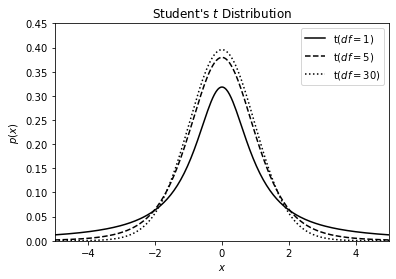

In [173]:
#Compare distributions for different degrees of freedom

x = np.linspace(-5,5,200)
dfs=[1,5,30]
linestyles = ['-', '--', ':']

for i in range(len(dfs)):
    dist = stats.t(dfs[i])
    label = r'$\mathrm{t}(df=%.0f)$' % dfs[i]
    plt.plot(x, dist.pdf(x), ls=linestyles[i], c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

##### Practice Problem

How many people would you need in a group in order for there to be a 50-50 chance that at least two people will share a birthday?

In [ ]:
#Step 1: Determine the model
# Assume 365 days in a year, assume that birthdays are uniformly distributed
# Suppose N people in a group
#Step 2: Repeatedly sample from random components to obtain many realizations 
#Step 3: Evaluate measures of interest

In [202]:
np.random.seed(3)
N_groups = 10000
N_people = 38
groups = np.random.randint(low=1,high=366,size=(N_groups,N_people))
print(groups)

[[363 153 250 ...  21 351  50]
 [207  29  55 ... 233 173 177]
 [316 183  92 ... 149  63  23]
 ...
 [314 336 212 ... 174  11 155]
 [218  29 300 ... 110 201  36]
 [117 124 333 ...  99  98 130]]


In [203]:
np.mean([checkDups(g) for g in groups])

0.8649

In [191]:
def checkDups(group):
    ''' function to check whether a group has a duplicate birthday. 
        group is a numpy array'''
    if group.size>np.unique(group).size:
        return 1
    else:
        return 0

def checkProp(groupSize,numberGroups=10000):
    ''' function to get the proportion of groups with duplicate birthdays'''
    groups = np.random.randint(low=1,high=366,size=(numberGroups, groupSize))
    return np.mean([checkDups(g) for g in groups]) #list comprehension

In [208]:
groupSizes = np.arange(15,30)

estimates = [checkProp(n) for n in groupSizes]

print(list(zip(groupSizes,estimates)))

[(15, 0.2513), (16, 0.2841), (17, 0.3129), (18, 0.347), (19, 0.381), (20, 0.4134), (21, 0.4385), (22, 0.4718), (23, 0.5086), (24, 0.5286), (25, 0.5606), (26, 0.5998), (27, 0.6187), (28, 0.6473), (29, 0.6756)]


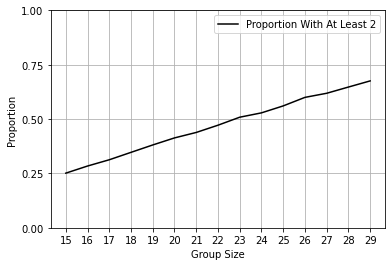

In [209]:
fig, ax = plt.subplots()
ax.set_xticks(np.linspace(15, 30, 16))
ax.set_yticks(np.linspace(0, 1, 5))
plt.plot(groupSizes, estimates, ls='-', c='black', label='Proportion With At Least 2')
plt.grid()
plt.legend()
plt.ylim(0,1)
plt.xlabel('Group Size')
plt.ylabel('Proportion')
plt.show()

In [ ]:
np.unique(group)

In [ ]:
group.size

##### Practice Problem

In [Blackjack](https://en.wikipedia.org/wiki/Blackjack), the dealer must take cards according to the following set of rules:
- Take cards until the sum is at least 17 
- If the hand contains an ace, then Ace will be counted as 11 when that results in a total between 17 and 21 (inclusive); Ace will be counted as 1 otherwise. [For example: ‘A6’-> 17, ‘88A’->17, ‘8A’->19]
- Dealer busts if he goes over 21.
- Card values: All face cards count as 10, all numeric cards count as their numeric value. Ace is counted as 1 or 11.

Write a program to estimate the probability that the dealer will bust in Blackjack

In [4]:
#Cards in deck and corresponding card values
cards=[2,3,4,5,6,7,8,9,10,'J','Q','K','A']
values=[2,3,4,5,6,7,8,9,10,10,10,10,11]

In [73]:
def checkDealer():
    hand = []
    aces = []
    total = 0
    while total<17:
        card = np.random.choice(values)
        if card == 11:
            aces.append('ace')
        hand.append(card)
        total = total + card

        if total>21 and aces:
            total = total - 10
            aces.pop()

    if total>21:
        return 1
    else:
        return 0

In [92]:
np.mean([checkDealer() for t in range(1000)])

0.27769

In [102]:
props = []

for i in range(1000):
    print(i,end=" ")
    props.append(np.mean([checkDealer() for t in range(10000)]))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [97]:
np.mean(props)

0.28173000000000004

In [101]:
print(np.percentile(props,2.5),",",np.percentile(props,97.5))

0.2 , 0.38


(array([  8.,  57., 135., 248., 247., 165.,  88.,  38.,  10.,   4.]),
 array([0.16 , 0.189, 0.218, 0.247, 0.276, 0.305, 0.334, 0.363, 0.392,
        0.421, 0.45 ]),
 <a list of 10 Patch objects>)

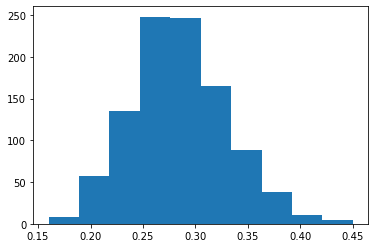

In [100]:
plt.hist(props)

<a id="markov"></a>
# Markov Chains

Suppose we have a set of *states* $S={s_1,s_2,...s_n}$ *(e.g., worker can be employed or unemployed; economy can be in a recession or in an expansion;)*


> **transition probability matrix** --  an $n\times n$ square matrix $P$ such that (i) each element of $P$ is nonnegative, and (ii) each row of $P$ sums to one (i.e., the $i$th row of $P$ can be regarded as a probability mass function over n possible outcomes conditional on being in state $s_i$ ).

Markov process starts in one of these states and moves successively from one state to another. Each move is called a step. If the chain is currently in state $s_i$, then it moves to state $s_j$ at the next step with a probability denoted by $p_{ij}$ ($i$th row, $j$th column in the matrix), and this probability does not depend upon which states the chain was in before the current state.


> **markov property** -- future outcomes of the process are based solely on its present state. 

> **markov chain** -- a Markov Chain is a Markov process with discrete time and discrete state space. 

Mathematically, Markov chains consist of a state space, which is a vector whose elements are all the possible states of a stochastic variable, the present state of the variable, and the transition matrix. The transition matrix contains all the probabilities that the variable will transition from one state to another, or remain the same. To calculate the probabilities of a variable ending up in certain states after $n$ discrete partitions of time, you need to multiply the present state vector with the transition matrix raised to the power of $n$.

##### Practice Problem

Write a function to simulate a two-state MC process.

In [4]:
def my_mc_simulation(current_state, states, P, T=10000):

    chain = np.zeros(T,dtype=int)

    for t in range(0,T):
        chain[t] = current_state
        next_state = np.random.choice(states, p=P[current_state])
        current_state = next_state #moving to the next state
    
    return chain

In [5]:
states = np.arange(3) #vector of states
current_state = 0 #current state
P = np.array([[0,.5,.5],[1,0,0],[0,0,1]])

results = my_mc_simulation(current_state, states, P)

##### Practice Problem

Consider a worker who, at any given time $t$, is either unemployed (state 0) or employed (state 1). Suppose that, over a one month period:

- An unemployed worker finds a job with probability $.10$.
- An employed worker loses her job and becomes unemployed with probability $.01$.

Problems:

1. Write out the transition probabilities in matrix form
2. Over the long-run, what fraction of time is a worker unemployed?
3. Conditional on employment, what is the probability of becoming unemployed at least once over the next 3 years?

In [9]:
P = np.array([[.9,.1],[.01,.99]])
current_state = 0
states = np.arange(2)

In [10]:
results = my_mc_simulation(current_state,states,P)

In [11]:
results

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
sum(results==0)/10000

0.0869

In [14]:
np.mean(results==0)

0.0869

In [15]:
current_state = 1
T = 36
P = np.array([[.9,.1],[.01,.99]])
states = np.arange(2)

n_sim = 1000
results = np.zeros((n_sim,T)) 
for i in range(n_sim):
    results[i,:] = my_mc_simulation(current_state,states,P,T)
    
count = 0
for i in range(n_sim):
    if (results[i,:]==0).any():
        count+=1
        
print(count/n_sim)

0.29


# Re-sampling Methods 

## Bootstrapping

> **Bootstrapping** is a re-sampling method for estimating the sampling distribution of a statistic by sampling with replacement from the original sample.

*Note: Most often the purpose is to estimate standard errors and confidence intervals of a mean. However, it can also be used to estimate the standard error or confidence interval for any statistic of interest (e.g., median, proportion, correlation, etc.). It is a "robust" alternative to estimation based on parametric assumptions. Especially, when those assumptions are in questionable or not feasible to obtain.



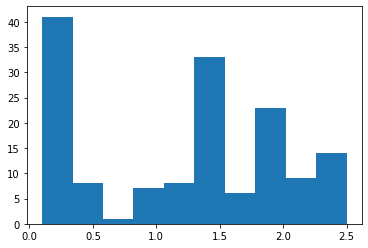

In [16]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')
df = pd.DataFrame(iris)
g = plt.hist(df.petal_width)

In [17]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [18]:
np.mean(df.petal_width)

1.199333333333334

In [20]:
original_sample = df.petal_width.to_numpy()
original_sample

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [22]:
len(original_sample)

150

In [21]:
original_sample.mean()

1.1993333333333336

In [36]:
resample = np.random.choice(original_sample,size=150)
resample.mean()

1.142666666666667

In [43]:
resampled_means = []
for i in range(10000):
    random_resample_indices = np.random.randint(150,size=150)
    m = np.mean(df.petal_width[random_resample_indices])
    resampled_means.append(m)

In [44]:
np.random.randint(150,size=150)

array([ 98, 105,  10,  73,  31,  99,  22,  24, 116,  54,  66,  66,  67,
        51,  25, 120, 145, 132, 132,  14, 137,  27,  26,  40,  73,   0,
        13, 112,  39,  38,  12,  94,  20, 110,  58,  40,  83, 118,  62,
        71,  71,  22,  93,  66,  31,   1,  59,  88,  64,  12,  88,  46,
       118,  62, 128,  33, 113,  13,  77,  83,   8,  28,  61, 101,  32,
        79,  46,  29, 129,  47,   6,   5,   4,  85,  20, 141,  65,  92,
        56, 120,  51, 149,  11,  41, 106,  46,  62,  11,  58,  24,  64,
       115, 136,  97, 135,   3, 106, 113,  70,  76,  76,  58,  32,  75,
        47, 133,   7, 119,  26,   0, 112,  70,  58,  48,  57,  51, 136,
       130,  65,  44, 104,  33,  47, 121,  51,  45,  98,  25, 106,  54,
        70,  81, 118,  60, 145, 126,  62, 146,  88, 140,  51, 113, 106,
        44, 141, 128,   3,  12,  88,  77])

(array([   3.,    3.,    8.,   18.,   33.,  100.,  190.,  335.,  505.,
         690.,  947., 1122., 1201., 1182., 1094.,  874.,  657.,  428.,
         280.,  181.,   81.,   39.,   19.,    7.,    3.]),
 array([0.95666667, 0.97557333, 0.99448   , 1.01338667, 1.03229333,
        1.0512    , 1.07010667, 1.08901333, 1.10792   , 1.12682667,
        1.14573333, 1.16464   , 1.18354667, 1.20245333, 1.22136   ,
        1.24026667, 1.25917333, 1.27808   , 1.29698667, 1.31589333,
        1.3348    , 1.35370667, 1.37261333, 1.39152   , 1.41042667,
        1.42933333]),
 <a list of 25 Patch objects>)

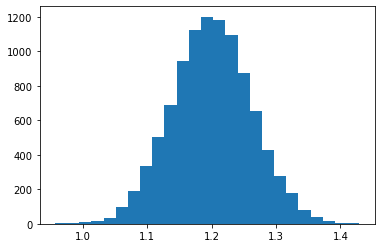

In [45]:
plt.hist(resampled_means,bins=25)

In [46]:
#.025 percentile
print(np.percentile(resampled_means,2.5))
#.975 percentile
print(np.percentile(resampled_means,97.5))

1.0806499999999999
1.3226666666666662


In [47]:
np.std(resampled_means)

0.06201993979627311

In [ ]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(x)
print(np.mean(x, axis=0))

In [57]:
original_sample

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [60]:
original_sample[np.array([[1,5,5],[6,1,5]])]

array([[0.2, 0.4, 0.4],
       [0.3, 0.2, 0.4]])

### Example 1
A function that calculates a bootsrapped standard error of a statistic 'stat'. Stat could be any function that calculates a statistic of interest (e.g., np.mean, np.median, np.std, etc)

In [49]:
data = original_sample
n_sample = 1000
stat = np.mean

In [51]:
n = len(data)

print(n)

150


In [53]:
random_resample_indices = np.random.randint(150,size=150)
print(random_resample_indices)

[102  55  12 133  99 116 101  45  22 135  98  81  16  90 117  65  12  86
 116 134  51 108  22 101 112  56  26   3  22  58  94 108  75 127 147  41
  51  34 141 127  72  65 115 138 136  28  74  91  58  62  56  30  48 133
 147 132 112   6 148  33  18  79  10   3  61 121 134  27  92  64  71  54
   6  39  89  31  63  81  90  14  53  70  85 135  23  95   1  32  43 117
  82  46  64  48   4  55  46  29 112  25  82 105  27  31  42  44  21  36
  34  62 113   1 131  34   1 128  98  64 149  87  14 139 110  82  45  93
  48  37  90   9 134  51  58  36 114  47 113  20  26  62  73   0 123 141
  77  25  44  95   4  27]


In [62]:
def bootstrap_sterr(data, n_samples, stat):
    
    n = len(data)                                #get length of the data
    ix = np.random.randint(0, n, (n_samples, n)) #get an array of bootsrapped indices
    samples = data[ix]                           #create bootrapped samples
    sterr = np.std(stat(samples, axis=1))        #calculate standard deviation of the sampling distribution of 'stat'
    
    return sterr

In [65]:
#Example: calculate bootsrapped standard error of the mean of the petal_width in Iris data set
bootstrap_sterr(original_sample, 10000, np.std)

0.02521204366750396

### Example 2
Create a function that calculates a bootsrapped confidence interval of a statistic 'stat'. This is done by first ordering the statistics, then selecting values at the chosen percentile for the confidence interval. The chosen percentile in this case is often called alpha.

In [67]:
def bootstrap_ci(data, n_samples, stat):
    
    n = len(data)                                #get length of the data
    ix = np.random.randint(0, n, (n_samples, n)) #get an array of bootsrapped indices
    samples = data[ix]                           #create bootrapped samples
    
    distribution = stat(samples, axis=1)

    return np.percentile(distribution,2.5),np.percentile(distribution,97.5)

In [70]:
bootstrap_ci(original_sample, 10000, np.std)

(0.7067618803741492, 0.8058867786447383)

<a id="permutation"></a>
# Permutation Tests

> **permutation** -  an arrangement or order of members of a set.

*Note: word "permutation" also refers to the process of changing the order.

<a id="itertools"></a>
## itertools

> [**.product()**](https://docs.python.org/3/library/itertools.html#itertools.product) -- return cartesian product of elements

> [**.permutations()**](https://docs.python.org/3/library/itertools.html#itertools.permutations) -- return permutation of elements

> [**.combinations()**](https://docs.python.org/3/library/itertools.html#itertools.combinations) -- return combination of elements

> [**.combinations_with_replacement()**](https://docs.python.org/3/library/itertools.html#itertools.combinations_with_replacement) -- return combination with replacements

In [71]:
import itertools
list( itertools.product(['a','b','c'],[1,2,3]) )

[('a', 1),
 ('a', 2),
 ('a', 3),
 ('b', 1),
 ('b', 2),
 ('b', 3),
 ('c', 1),
 ('c', 2),
 ('c', 3)]

In [73]:
list( itertools.permutations(['a','b','c','d']) )

[('a', 'b', 'c', 'd'),
 ('a', 'b', 'd', 'c'),
 ('a', 'c', 'b', 'd'),
 ('a', 'c', 'd', 'b'),
 ('a', 'd', 'b', 'c'),
 ('a', 'd', 'c', 'b'),
 ('b', 'a', 'c', 'd'),
 ('b', 'a', 'd', 'c'),
 ('b', 'c', 'a', 'd'),
 ('b', 'c', 'd', 'a'),
 ('b', 'd', 'a', 'c'),
 ('b', 'd', 'c', 'a'),
 ('c', 'a', 'b', 'd'),
 ('c', 'a', 'd', 'b'),
 ('c', 'b', 'a', 'd'),
 ('c', 'b', 'd', 'a'),
 ('c', 'd', 'a', 'b'),
 ('c', 'd', 'b', 'a'),
 ('d', 'a', 'b', 'c'),
 ('d', 'a', 'c', 'b'),
 ('d', 'b', 'a', 'c'),
 ('d', 'b', 'c', 'a'),
 ('d', 'c', 'a', 'b'),
 ('d', 'c', 'b', 'a')]

In [74]:
list( itertools.combinations(['a','b','c','d'],2) )

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

In [75]:
list( itertools.combinations_with_replacement(['a','b','c','d'],2) )

[('a', 'a'),
 ('a', 'b'),
 ('a', 'c'),
 ('a', 'd'),
 ('b', 'b'),
 ('b', 'c'),
 ('b', 'd'),
 ('c', 'c'),
 ('c', 'd'),
 ('d', 'd')]

##### Practice Problem

Suppose you have the following set of bills in your wallet: [20,20,10,10,10,10,5,5,5,1,1,1,1,1,1,1,1,1,1] how many ways are there to make a change out of \$50?

In [93]:
wallet = [20,20,10,10,10,10,5,5,5,1,1,1,1,1,1,1,1,1,1]
n = 11
combos = list(itertools.combinations(wallet,n))
results = {}
for c in combos:
#     print(c,"->",sum(c))
    if sum(c) == 50:
#         print("-->",c)
        results[c]=True
        
print(results)

{(10, 10, 10, 5, 5, 5, 1, 1, 1, 1, 1): True}


In [95]:
wallet = [20,20,10,10,10,10,5,5,5,1,1,1,1,1,1,1,1,1,2]
results = {}
for n in range(1,len(wallet)+1):
    
    combos = list(itertools.combinations(wallet,n))

    for combo in combos:
        if sum(combo)==50:
            if combo not in results:
                results[combo]=True

results

{(20, 20, 10): True,
 (20, 20, 5, 5): True,
 (20, 10, 10, 10): True,
 (20, 10, 10, 5, 5): True,
 (10, 10, 10, 10, 5, 5): True,
 (20, 20, 5, 1, 1, 1, 2): True,
 (20, 20, 5, 1, 1, 1, 1, 1): True,
 (20, 10, 10, 5, 1, 1, 1, 2): True,
 (20, 10, 10, 5, 1, 1, 1, 1, 1): True,
 (20, 10, 5, 5, 5, 1, 1, 1, 2): True,
 (10, 10, 10, 10, 5, 1, 1, 1, 2): True,
 (20, 10, 5, 5, 5, 1, 1, 1, 1, 1): True,
 (10, 10, 10, 10, 5, 1, 1, 1, 1, 1): True,
 (10, 10, 10, 5, 5, 5, 1, 1, 1, 2): True,
 (20, 20, 1, 1, 1, 1, 1, 1, 1, 1, 2): True,
 (10, 10, 10, 5, 5, 5, 1, 1, 1, 1, 1): True,
 (20, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2): True,
 (20, 10, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2): True,
 (10, 10, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2): True,
 (10, 10, 10, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2): True}

> **permutation test** - a test based on permutations of the labels among the members of the set

*Note: Permutation tests are sometimes called randomization, re-randomization, or exact test.

Permutation tests are nonparametric randomization
tests that which the distribution of the test statistic
is obtained through random permutation of treatment (or group) labels among observations ([Good,
2013](https://books.google.com/books?id=pK3hBwAAQBAJ&printsec=frontcover)). The *p*-value for the statistical comparison is obtained
by comparing the actual test statistic to the constructed distribution.

For example, consider two groups A (60 observations) and B (40 observations). Thus, there were 100 observations labeled either
“A” or “B”. Suppose that we are interested in the difference of means
as the statistic, denote the original difference
as $d_{original}$. Under the null hypothesis, the labels are
interchangeable among subjects because treatment does not
matter (i.e., there is no difference between the groups). Therefore, in order to construct the empirical distribution
of the test statistic under the null hypothesis, we generate
$M$ random permutations of the labels (e.g., $M=10,000$), and
then, for each permutation $m$, calculate the statistic of interest, $d_{m}$. Finally, by counting the number of permutations,
$b$, for which the absolute value of the statistic of interest exceeds
or is equal to the absolute value of $d_{original}$, the two-tailed
p-value rejecting the null hypothesis can be calculated
as $p = \frac{b+1}{M+1}$ ([Ernst, 2004](https://projecteuclid.org/euclid.ss/1113832732); [Phipson & Smyth, 2010](https://www.degruyter.com/view/journals/sagmb/9/1/article-sagmb.2010.9.1.1585.xml.xml)).

In [96]:
import numpy as np

In [104]:
### Create example samples
sample1=np.array([13, 11, 13, 15, 21])
sample2=np.array([ 14, 20, 22, 24, 25])

In [105]:
### Calculate original statistic
original_stat=np.mean(sample1)-np.mean(sample2)
print("Original Statistic:",original_stat)

Original Statistic: -6.4


In [106]:
combined=np.append(sample1,sample2)
#print combined
permutations=np.matrix(list(itertools.permutations(combined)))
permutations

matrix([[13, 11, 13, ..., 22, 24, 25],
        [13, 11, 13, ..., 22, 25, 24],
        [13, 11, 13, ..., 24, 22, 25],
        ...,
        [25, 24, 22, ..., 11, 13, 13],
        [25, 24, 22, ..., 13, 13, 11],
        [25, 24, 22, ..., 13, 11, 13]])

In [107]:
n_permut=len(permutations)
print("Number of permutations:",len(permutations))

Number of permutations: 3628800


In [108]:
distr=permutations[:,0:5].mean(axis=1)-permutations[:,5:9].mean(axis=1)

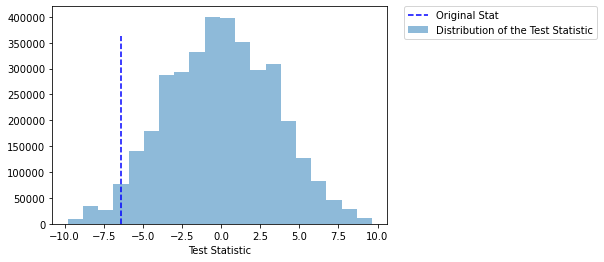

In [109]:
plt.hist(distr,20,alpha=0.5, label='Distribution of the Test Statistic')
plt.plot([original_stat, original_stat], [0, n_permut/10], 'b--', label='Original Stat') 
plt.xlabel('Test Statistic')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [110]:
count=(np.abs(distr)>=np.abs(original_stat)).sum()
print("Count: ",count," out of ",n_permut)
p_val=np.round((count+1)/(1+n_permut),3)
print("Two-sided test p-value: ",p_val)

Count:  221760  out of  3628800
Two-sided test p-value:  0.061


##### Practice Problem

Using the cars dataset, test whether the median horsepower of European cars is different from the median horsepower of Asian cars?

In [111]:
cars = pd.read_csv("CarsData.csv")

eu_cars = cars[cars['origin'] == 'Europe']
as_cars = cars[cars.origin == 'Asia']

eu_hp = eu_cars.horsepower.to_list()
as_hp = as_cars.horsepower.to_list()

In [116]:
diff=np.median(eu_hp)-np.median(as_hp)

In [117]:
diff

1.5

In [118]:
### Create example samples
sample1=np.array(eu_hp)
n1 = len(sample1)
sample2=np.array(as_hp)
n2 = len(sample2)
combined=np.append(sample1,sample2)
n = len(combined)

idx = np.arange(n)
sim_d = []
for i in range(10000):
    np.random.shuffle(idx)
    d = np.median(combined[idx][:n1]) - np.median(combined[idx][n1:])
    sim_d.append(d)

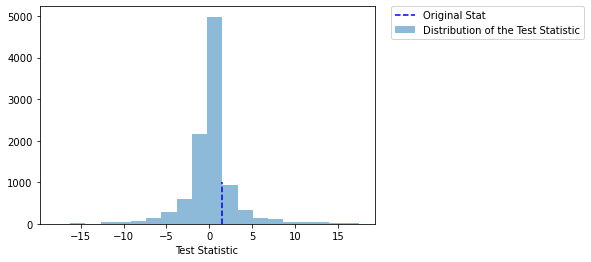

In [119]:
plt.hist(sim_d,20,alpha=0.5, label='Distribution of the Test Statistic')
plt.plot([diff, diff], [0, 10000/10], 'b--', label='Original Stat') 
plt.xlabel('Test Statistic')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [120]:
#calculating the p-value for two-sided test
count=(np.abs(sim_d)>=np.abs(diff)).sum()
print("Count: ",count," out of ",10000)
p_val=np.round((count+1)/(1+10000),3)
print("Two-sided test p-value: ",p_val)

Count:  3785  out of  10000
Two-sided test p-value:  0.379
